In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from ds import Datas

In [90]:
# LOAD Datas()

dataset = "PO_norm_part3_mult4"
# dataset = "SPP_p25"
# dataset = "NN_linear_deg5"
file = open("../../data/" + dataset + ".txt", "rb")

data = pickle.load(file)
file.close()

print(np.shape(data.is_optimum)) # [n_bvars, n_instances, n_Mstrategies]
print(data.M_strategies)
print(data.bvars)
print(data.filenames)


(7, 1000, 2)
['our_M', 'qiskit_M']
[ 6  9 12 15 18 21 24]
[['../../toys/PO_norm_part3_mult4/6/random10042_6.lp'
  '../../toys/PO_norm_part3_mult4/6/random10142_6.lp'
  '../../toys/PO_norm_part3_mult4/6/random10242_6.lp' ...
  '../../toys/PO_norm_part3_mult4/6/random99742_6.lp'
  '../../toys/PO_norm_part3_mult4/6/random99842_6.lp'
  '../../toys/PO_norm_part3_mult4/6/random99942_6.lp']
 ['../../toys/PO_norm_part3_mult4/9/random10042_9.lp'
  '../../toys/PO_norm_part3_mult4/9/random10142_9.lp'
  '../../toys/PO_norm_part3_mult4/9/random10242_9.lp' ...
  '../../toys/PO_norm_part3_mult4/9/random99742_9.lp'
  '../../toys/PO_norm_part3_mult4/9/random99842_9.lp'
  '../../toys/PO_norm_part3_mult4/9/random99942_9.lp']
 ['../../toys/PO_norm_part3_mult4/12/random10042_12.lp'
  '../../toys/PO_norm_part3_mult4/12/random10142_12.lp'
  '../../toys/PO_norm_part3_mult4/12/random10242_12.lp' ...
  '../../toys/PO_norm_part3_mult4/12/random99742_12.lp'
  '../../toys/PO_norm_part3_mult4/12/random99842_12.lp'


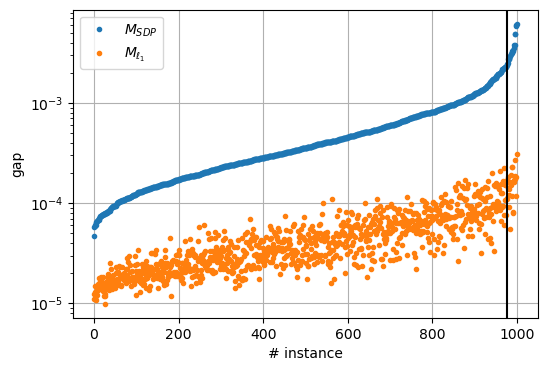

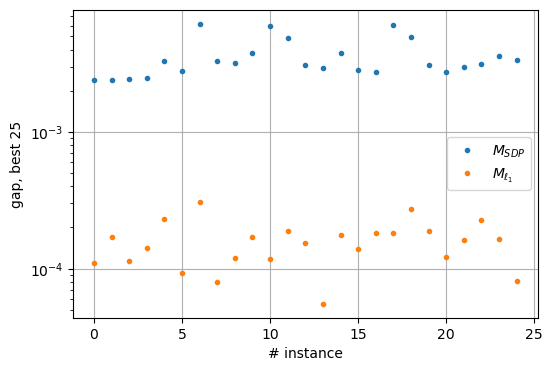

NN_linear_deg5 24


In [77]:
### CHERRYPICKING BIG GAP INSTANCES


var_idx = 20
gaps_o = data.gap_norm[var_idx,:,0]
gaps_q = data.gap_norm[var_idx,:,1]
idx_order = np.argsort(gaps_o)

size_cherries = 25

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(len(gaps_o)), gaps_o[idx_order], ".", color = "C0", label = r"$M_{SDP}$")
ax.plot(np.arange(len(gaps_q)), gaps_q[idx_order], ".", color = "C1", label = r"$M_{\ell_1}$")
ax.axvline(1000 - size_cherries, color = "k")
ax.set_xlabel("# instance")
ax.set_ylabel("gap")
ax.set_yscale("log")
ax.legend()
ax.grid()
plt.show()

# cherrypicking 
ind_largegaps = np.argpartition(gaps_o, -size_cherries)[-size_cherries:]

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(size_cherries), gaps_o[ind_largegaps], ".", color = "C0", label = r"$M_{SDP}$")
ax.plot(np.arange(size_cherries), gaps_q[ind_largegaps], ".", color = "C1", label = r"$M_{\ell_1}$")
ax.set_xlabel("# instance")
ax.set_ylabel(f"gap, best {size_cherries}")
ax.set_yscale("log")
ax.legend()
ax.grid()
plt.show()


print(dataset, data.bvars[var_idx])

In [ ]:
### Writing big-gap instances names to file. (get instances and analyze them in another code)

from pathlib import Path

file_path = f"../toys_adiabevol_simul/{dataset}/inst_names_{data.bvars[var_idx]}.txt"

if Path(file_path).exists():
    print(f"File already exists: {file_path}")
else:
    Path(file_path).touch()
    print(f"Created an empty file: {file_path}")

    f = open(file_path, "w")
    for i in ind_largegaps:
        f.write(data.filenames[var_idx,i]+"\n")
    f.close()
    print("File filled with instances names")

Created an empty file: ../toys_adiabevol_simul/NN_linear_deg5/inst_names_24.txt
File filled with instances names
